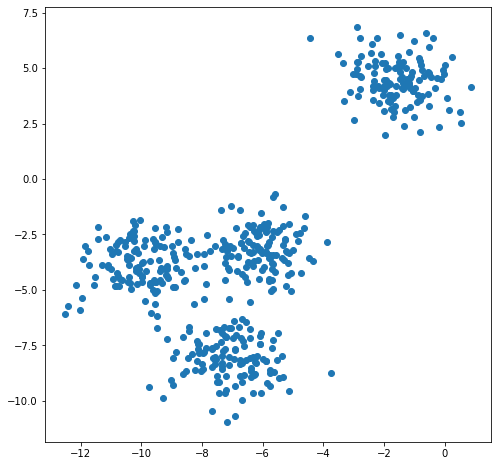

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# This particular setting has one distinct cluster and 3 clusters placed close together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.show();

In [2]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4).fit(X)
labels = km.labels_
cluster_centers = km.cluster_centers_

# 自己实现

In [55]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def plot_clusters(data, labels, cluster_centers=None, style=0, figsize=(8, 8)):
    # labels = np.array(labels).astype(float)
    n_clusters = len(cluster_centers)
    plt.figure(figsize=figsize)
    if style == 0:
        colors = cm.nipy_spectral(labels / n_clusters)
        plt.scatter(data[:, 0], data[:, 1], 
                    marker='o', s=30, c=colors,
                    lw=0, alpha=0.7)
        if cluster_centers is not None:
            plt.scatter(cluster_centers[:, 0], 
                        cluster_centers[:, 1],
                        marker='o', s=200,
                        c="white", edgecolor="k", alpha=1)
            for i, c in enumerate(cluster_centers):
                plt.scatter(c[0], c[1],
                            marker=f'${i}$', s=50, edgecolor='k', alpha=1)
    elif style == 1:
        for label in set(labels):
            flag = labels == label
            plt.scatter(data[flag, 0], data[flag, 1], 
                        marker='o', s=30, lw=0, alpha=0.7,
                        c=[cm.nipy_spectral(label / n_clusters)] * sum(flag),
                        label=f'{label}')
        if cluster_centers is not None:
            plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
                        c='white', edgecolor='k', marker='o', s=200)
            plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
                        c='k', marker='x', s=100)
        plt.legend(loc=0)
    plt.show();

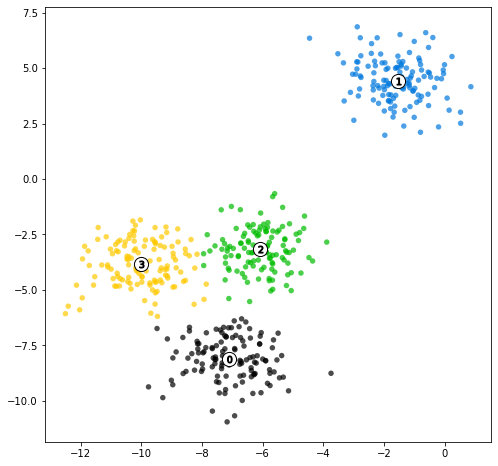

In [56]:
plot_clusters(X, labels, cluster_centers)

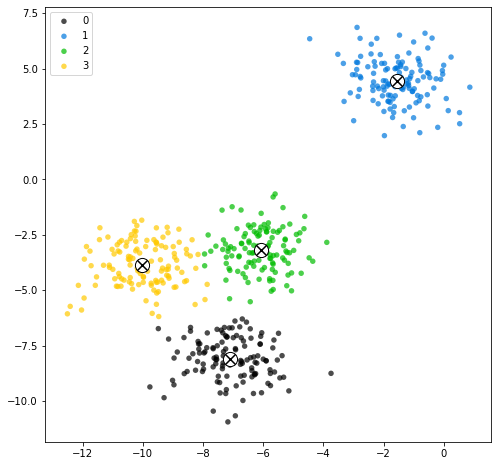

In [57]:
plot_clusters(X, labels, cluster_centers, style=1)

# `pyclustering`中的实现
- `pyclustering.cluster.kmeans.kmeans_visualizer.show_clusters`
- `pyclustering.cluster.cluster_visualizer`

## `kmeans_visualizer`
传入的第二个参数为各个cluster内的点在原数据集中的index。

In [18]:
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer

help(kmeans_visualizer)

Help on class kmeans_visualizer in module pyclustering.cluster.kmeans:

class kmeans_visualizer(builtins.object)
 |  !
 |  @brief Visualizer of K-Means algorithm's results.
 |  @details K-Means visualizer provides visualization services that are specific for K-Means algorithm.
 |  
 |  Static methods defined here:
 |  
 |  animate_cluster_allocation(data, observer, animation_velocity=500, movie_fps=1, save_movie=None)
 |      !
 |      @brief Animates clustering process that is performed by K-Means algorithm.
 |      
 |      @param[in] data (list): Dataset that is used for clustering.
 |      @param[in] observer (kmeans_observer): EM observer that was used for collection information about clustering process.
 |      @param[in] animation_velocity (uint): Interval between frames in milliseconds (for run-time animation only).
 |      @param[in] movie_fps (uint): Defines frames per second (for rendering movie only).
 |      @param[in] save_movie (string): If it is specified then animation

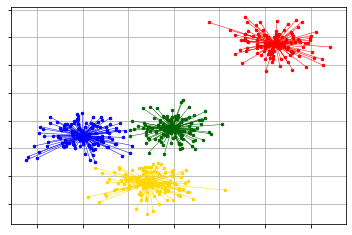

In [31]:
clusters = []
for label in sorted(set(labels)):
    clusters.append(np.where(labels == label)[0])
kmeans_visualizer.show_clusters(X, clusters, cluster_centers);